In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
pwd

'/content'

In [135]:
df = pd.read_csv('diamonds.csv')

In [136]:
df.shape

(53940, 10)

In [137]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [139]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [140]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [141]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Rearranging Columns

In [142]:
df2 = df.iloc[:,[0,1,2,3,4,5,7,8,9,6]]

In [143]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [144]:
df2.shape

(53940, 10)

### Checking for Outliers

In [145]:
col_name = df2.select_dtypes(include=['int','float']).columns


for i in col_name:
  mean = df2[i].mean()
  med =  df2[i].median()
  print(f'Mean for {i} is {mean}')
  print(f'Median for {i} is {med}')

Mean for carat is 0.7979397478680014
Median for carat is 0.7
Mean for depth is 61.749404894327036
Median for depth is 61.8
Mean for table is 57.45718390804598
Median for table is 57.0
Mean for x is 5.731157211716722
Median for x is 5.7
Mean for y is 5.734525954764553
Median for y is 5.71
Mean for z is 3.5387337782721544
Median for z is 3.53
Mean for price is 3932.799721913237
Median for price is 2401.0


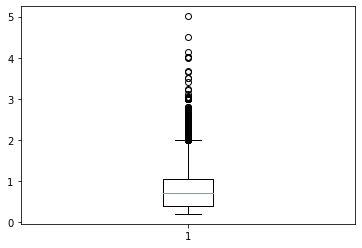

In [146]:
# before removing outliers
plt.boxplot(df2.carat)
plt.show()

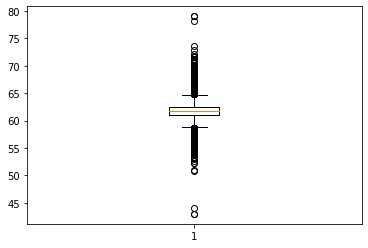

In [147]:
plt.boxplot(df2.depth)
plt.show()

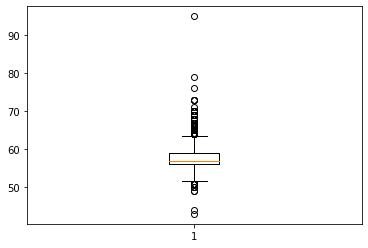

In [148]:
plt.boxplot(df2.table)
plt.show()

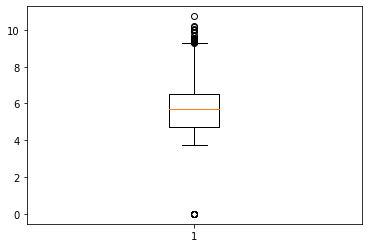

In [149]:
plt.boxplot(df2.x)
plt.show()

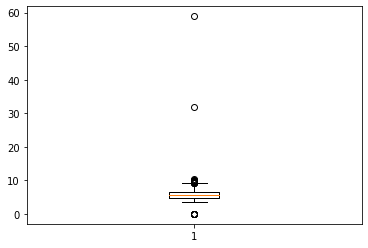

In [150]:
plt.boxplot(df2.y)
plt.show()

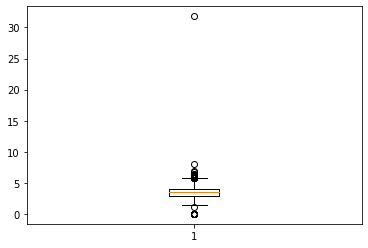

In [151]:
plt.boxplot(df2.z)
plt.show()

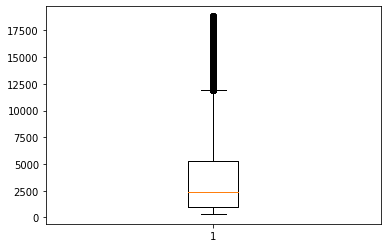

In [152]:
# after removing outliers
plt.boxplot(df2.price)
plt.show()

In [153]:
df2.shape

(53940, 10)

### Treating Outliers

In [154]:
def outliers(col_name):
  Q1 = np.percentile(df2[col_name], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(df2[col_name], 75,
                   interpolation = 'midpoint')
  IQR = Q3 - Q1

  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)

  # df2.drop(upper[0], inplace = True)
  # df2.drop(lower[0], inplace = True)

  # df2.drop(df2[df2[col_name] == upper[0]].index, inplace = True)
  # df2.drop(df2[df2[col_name] == lower[0]].index, inplace = True)
  # df2.drop[(df2[col_name] > upper) & (df2[col_name] < lower)]
  # df2[col_name] = df2[(df2[col_name] < upper) & (df2[col_name] > lower)]
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True)


In [155]:
outliers('carat')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


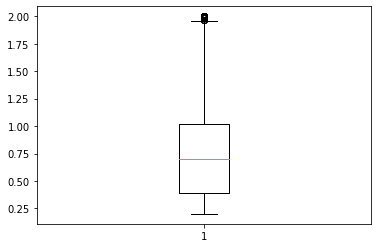

In [156]:
plt.boxplot(df2.carat)
plt.show()

In [157]:
df2.shape

(52051, 10)

In [158]:
outliers('depth')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


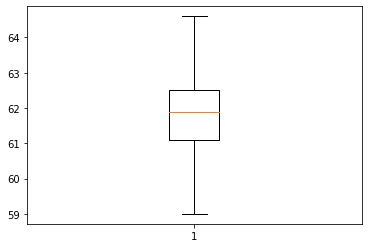

In [159]:
plt.boxplot(df2.depth)
plt.show()

In [160]:
outliers('table')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


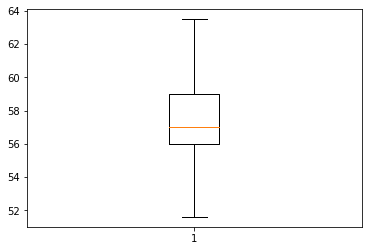

In [161]:
plt.boxplot(df2.table)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


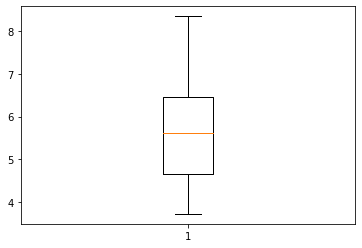

In [162]:
outliers('x')
plt.boxplot(df2.x)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


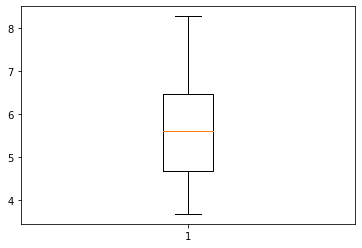

In [163]:
outliers('y')
plt.boxplot(df2.y)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


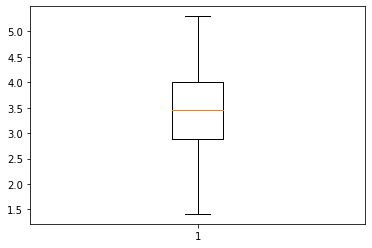

In [164]:
outliers('z')
plt.boxplot(df2.z)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


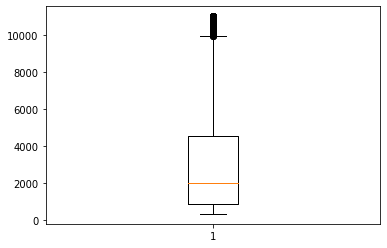

In [165]:
outliers('price')
plt.boxplot(df2.price)
plt.show()

In [166]:
df2.shape

(46530, 10)

In [167]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


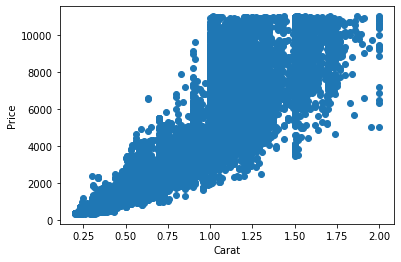

In [168]:
plt.scatter(df2['carat'],df2['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

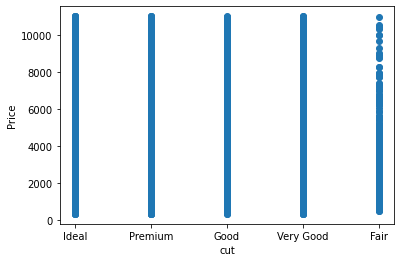

In [169]:
plt.scatter(df2['cut'],df2['price'])
plt.xlabel('cut')
plt.ylabel('Price')
plt.show()

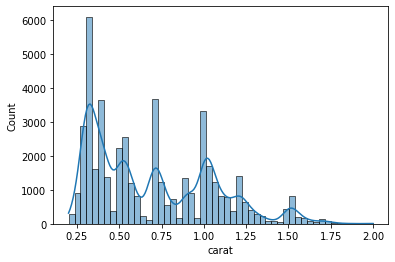

In [170]:
sns.histplot(data=df2['carat'],kde=True)

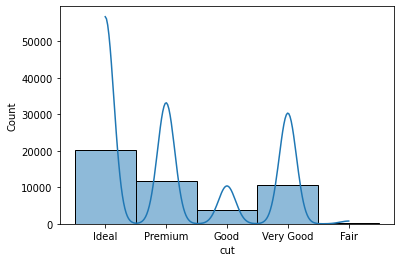

In [171]:
sns.histplot(data=df2['cut'],kde=True)

In [172]:
col_name

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

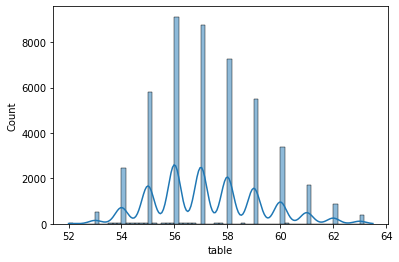

In [173]:
sns.histplot(data=df2['table'],kde=True)

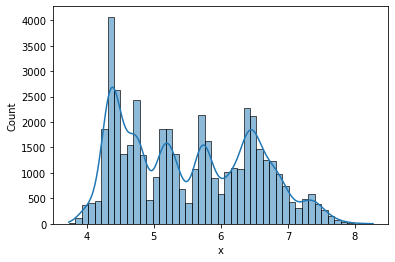

In [174]:
sns.histplot(data=df2['x'],kde=True)

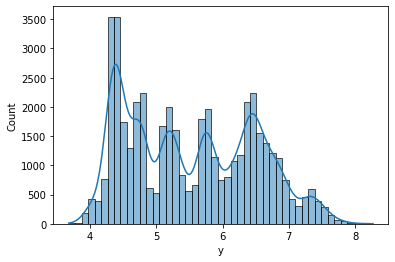

In [175]:
sns.histplot(data=df2['y'],kde=True)

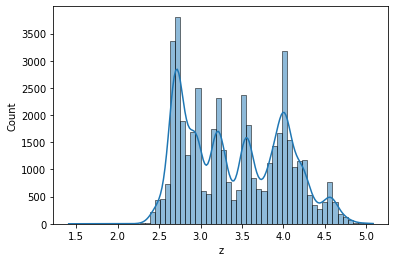

In [176]:
sns.histplot(data=df2['z'],kde=True)

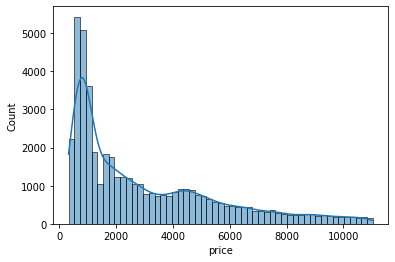

In [177]:
sns.histplot(data=df2['price'],kde=True)

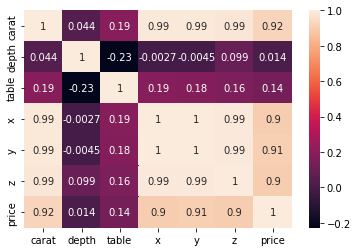

In [178]:
sns.heatmap(df2.iloc[:,:].corr(),annot=True)

We Can see Price column have strong corelation with carat,x,y and z columns.

In [179]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


In [180]:
df2.price.max()

11039

In [181]:
df2.describe()

,carat,depth,table,x,y,z,price
count,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000
mean,0.697936,61.804300,57.238695,5.521271,5.526300,3.413812,2998.654481
std,0.362002,1.077364,2.013849,0.964439,0.958606,0.597191,2598.175430
min,0.200000,59.000000,52.000000,3.730000,3.680000,1.410000,326.000000
25%,0.370000,61.200000,56.000000,4.620000,4.630000,2.850000,880.000000
50%,0.590000,61.900000,57.000000,5.390000,5.400000,3.325000,2002.000000
75%,1.010000,62.500000,59.000000,6.390000,6.390000,3.960000,4522.000000
max,2.000000,64.600000,63.500000,8.270000,8.270000,5.080000,11039.000000


# KNN Algorithm from Scratch

###Splitting Data into Train Test

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


In [184]:
X = df2.iloc[:,:9]

In [185]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [186]:
y = df2['price']

In [187]:
y

0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 46530, dtype: int64

In [188]:
X.shape

(46530, 9)

In [189]:
y.shape

(46530,)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [191]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((34897, 9), (11633, 9), (34897,), (11633,))

In [192]:
#Handling Categorical Data

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,cut,color,clarity
1988,Premium,H,SI1
49294,Ideal,H,VS2
14811,Very Good,G,VS2
10396,Very Good,G,SI1
15163,Ideal,H,SI1


In [193]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [196]:
X_train_cat['cut']=le.fit_transform(X_train_cat['cut'])
X_train_cat['clarity']=le.fit_transform(X_train_cat['clarity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
X_train_cat.head()

,cut,color,clarity
1988,3,3,2
49294,2,3,5
14811,4,4,5
10396,4,4,2
15163,2,3,2


In [198]:
# Handling Numerical Data
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
1988,0.90,62.4,56.0,6.13,6.05,3.80
49294,0.33,61.0,55.0,4.49,4.52,2.75
14811,1.04,61.3,58.0,6.45,6.53,3.98
10396,0.31,63.1,59.0,4.33,4.29,2.72
15163,1.24,62.5,56.0,6.92,6.88,4.31


In [199]:
X_train_cn = pd.concat([X_train_cat,X_train_num], axis=1)
X_train_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
1988,3,3,2,0.90,62.4,56.0,6.13,6.05,3.80
49294,2,3,5,0.33,61.0,55.0,4.49,4.52,2.75
14811,4,4,5,1.04,61.3,58.0,6.45,6.53,3.98
10396,4,4,2,0.31,63.1,59.0,4.33,4.29,2.72
15163,2,3,2,1.24,62.5,56.0,6.92,6.88,4.31


In [200]:
# Standardizing The Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new = pd.DataFrame(scaler.fit_transform(X_train_cn),columns = X_train_cn.columns,index = X_train_cn.index)

X_train_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
1988,0.404016,-0.872082,-1.094491,0.557703,0.556919,-0.612368,0.630616,0.545645,0.646236
49294,-0.659253,-0.872082,0.641436,-1.016385,-0.745812,-1.109666,-1.069929,-1.050401,-1.111871
14811,1.467285,-0.278266,0.641436,0.944321,-0.466656,0.382229,0.962430,1.046365,0.947625
10396,1.467285,-0.278266,-1.094491,-1.071616,1.208284,0.879527,-1.235836,-1.290329,-1.162102
15163,-0.659253,-0.872082,-1.094491,1.496632,0.649971,-0.612368,1.449781,1.411473,1.500173


In [201]:
# Test Data Preprocessing
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()


,cut,color,clarity
38352,Very Good,F,SI1
38766,Ideal,E,VVS2
1487,Very Good,G,I1
44147,Very Good,G,VS1
33251,Ideal,I,VS1


In [202]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
# Label Encoding
X_test_cat['cut']=le.fit_transform(X_test_cat['cut'])
X_test_cat['clarity']=le.fit_transform(X_test_cat['clarity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [204]:
X_test_cat.head()

,cut,color,clarity
38352,4,5,2
38766,2,6,7
1487,4,4,0
44147,4,4,4
33251,2,2,4


In [205]:
# Handling numerical columns in test
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,carat,depth,table,x,y,z
38352,0.47,61.1,61.0,4.97,5.01,3.05
38766,0.31,61.0,56.0,4.43,4.39,2.69
1487,1.03,63.2,58.0,6.44,6.34,4.04
44147,0.54,64.0,59.5,5.12,5.17,3.30
33251,0.45,62.1,55.0,4.90,4.92,3.05


In [206]:
X_test_cn = pd.concat([X_test_cat,X_test_num], axis=1)
X_test_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
38352,4,5,2,0.47,61.1,61.0,4.97,5.01,3.05
38766,2,6,7,0.31,61.0,56.0,4.43,4.39,2.69
1487,4,4,0,1.03,63.2,58.0,6.44,6.34,4.04
44147,4,4,4,0.54,64.0,59.5,5.12,5.17,3.30
33251,2,2,4,0.45,62.1,55.0,4.90,4.92,3.05


In [207]:
# Standardizing the data
X_test_new = pd.DataFrame(scaler.transform(X_test_cn),columns = X_test_cn.columns,index = X_test_cn.index)

X_test_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
38352,1.467285,0.315549,-1.094491,-0.629767,-0.652760,1.874123,-0.572209,-0.539249,-0.609555
38766,-0.659253,0.909364,1.798720,-1.071616,-0.745812,-0.612368,-1.132145,-1.186013,-1.212334
1487,1.467285,-0.278266,-2.251775,0.916705,1.301336,0.382229,0.952060,0.848163,1.048088
44147,1.467285,-0.278266,0.062794,-0.436458,2.045754,1.128176,-0.416671,-0.372342,-0.190958
33251,-0.659253,-1.465897,0.062794,-0.684998,0.277762,-1.109666,-0.644793,-0.633134,-0.609555


# KNN from Scratch

In [208]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

In [209]:
Model=KNN_Regression(k=3)
Model.fit_func(X_train_new,y_train)
y_pred_KNN=Model.predict_func(X_test_new)

In [214]:
y_pred_KNN

array([1056.33333333,  886.33333333, 5829.        , ...,  808.        ,
       2948.        , 4559.33333333])

In [210]:
from sklearn import metrics
scratch_acu=metrics.r2_score(y_test,y_pred_KNN)
scratch_acu

0.957920599161154

In [211]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_KNN))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

Mean Absolute Error:  298.27625433393507
Mean Squared Error:  284821.93689408485
Root Mean Squared Error:  533.6871151658852


# KNN using Sklearn

In [212]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_new, y_train)

KNeighborsRegressor()

In [213]:
y_test_pred = regressor.predict(X_test_new)


In [215]:
sk_acu=metrics.r2_score(y_test,y_test_pred)
sk_acu

0.9598828477570917

In [216]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  293.0579902002923
Mean Squared Error:  271540.1069577925
Root Mean Squared Error:  521.0951035634403


# Comparing Accuracy of Both

In [217]:
print("Accuracy calculated using Numpy Broadcasting:",scratch_acu)
print("Accuracy calculated using Scikitlearn:",sk_acu)

Accuracy calculated using Numpy Broadcasting: 0.957920599161154
Accuracy calculated using Scikitlearn: 0.9598828477570917
